In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from ast import literal_eval

In [202]:
latlong_df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_sectors_coordinates.csv")

In [203]:
latlong_df.loc[0,['coordinates']] = "28.3027704° N, 76.9620496° E"
latlong_df.loc[[113,114],['coordinates']] = "28.415914° N, 77.027447° E"
latlong_df.loc[1,['coordinates']] = "28.4517274° N, 76.962187° E"
latlong_df.loc[27,['coordinates']] = "28.5095° N, 77.0320° E"
latlong_df.loc[[37,38],['coordinates']] = "28.4909° N, 77.0176° E"
latlong_df.loc[78,['coordinates']] = "28.3960701° N, 77.0372311° E"
latlong_df.loc[102,['coordinates']] = "28.4446° N, 76.9542° E"

In [204]:
latlong_df['latitude'] = latlong_df['coordinates'].str.split(',').str.get(0)

In [205]:
latlong_df['longitude'] = latlong_df['coordinates'].str.split(',').str.get(1)

In [206]:
latlong_df['latitude'] = latlong_df['latitude'].str.replace("° N", '').str.strip()
latlong_df['longitude'] = latlong_df['longitude'].str.replace("° E", '').str.strip()

In [207]:
latlong_df['latitude'] = latlong_df['latitude'].astype('float')
latlong_df['longitude'] = latlong_df['longitude'].astype('float')

In [208]:
latlong_df

,sector,coordinates,latitude,longitude
0,bissar,"28.3027704° N, 76.9620496° E",28.302770,76.962050
1,dwarka expressway,"28.4517274° N, 76.962187° E",28.451727,76.962187
2,gwal pahari,"28.4330° N, 77.1464° E",28.433000,77.146400
3,manesar,"28.3515° N, 76.9428° E",28.351500,76.942800
4,pratap nagar,"28.4633° N, 77.0212° E",28.463300,77.021200
...,...,...,...,...
110,sector 99,"28.4640° N, 76.9614° E",28.464000,76.961400
111,sector 99a,"28.4561° N, 76.9542° E",28.456100,76.954200
112,sector 9a,"28.4711° N, 76.9981° E",28.471100,76.998100
113,sohna road,"28.415914° N, 77.027447° E",28.415914,77.027447


In [209]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_missing_values_imputed")
df = df.drop("Unnamed: 0", axis =1)
final_df = df.merge(latlong_df, on = 'sector')

In [210]:
final_df.sample(5)

,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,...,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,coordinates,latitude,longitude
2706,la vida by tata housing,1.55,sector 113,11654.0,flat,1276.000000,2.0,2.0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,174.0,"28.5287° N, 77.0233° E",28.5287,77.0233
3523,global hill view,0.33,sector 11,4271.0,flat,756.490000,2.0,2.0,0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"28.4531° N, 77.0202° E",28.4531,77.0202
952,m3m golfestate,5.00,sector 65,18518.0,flat,2800.000000,3.0,3.0,3+,28.0,...,1.0,1.0,0.0,0.0,0.0,0.0,165.0,"28.4030° N, 77.0690° E",28.4030,77.0690
3270,imperia the esfera,0.85,sector 37c,5386.0,flat,1446.355794,2.0,3.0,3,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,49.0,"28.4515° N, 76.9882° E",28.4515,76.9882
2312,eldeco accolade,1.20,sector 33,8043.0,flat,1483.127000,2.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,56.0,"28.4420° N, 77.0207° E",28.4420,77.0207


In [211]:
group_df = final_df.groupby('sector').mean()[['price_per_sqft', 'built_up_area', 'latitude', 'longitude']].reset_index()
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",width=1200,height=700,hover_name= 'sector')
fig.show()

<ipython-input-211-e29a43f14b9b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [212]:
group_df

,sector,price_per_sqft,built_up_area,latitude,longitude
0,bissar,13683.000000,2415.525000,28.302770,76.962050
1,dwarka expressway,8248.285714,1744.726276,28.451727,76.962187
2,gwal pahari,9585.888889,3044.445601,28.433000,77.146400
3,manesar,4607.838710,2029.179071,28.351500,76.942800
4,pratap nagar,8310.500000,2089.549500,28.463300,77.021200
...,...,...,...,...,...
110,sector 99,7577.400000,2068.906467,28.464000,76.961400
111,sector 99a,6270.187500,1194.154539,28.456100,76.954200
112,sector 9a,7289.090909,2030.289570,28.471100,76.998100
113,sohna road,6251.357769,864.007904,28.415914,77.027447


In [268]:
final_df.to_csv("data_viz1.csv")

In [290]:
sector_features = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_cleaned_v1.csv")

In [291]:
sector_features = sector_features[['sector', 'features']]

In [292]:
from wordcloud import WordCloud

In [293]:
sector_features = sector_features[~sector_features['features'].isna()]
sector_features['features'] = sector_features['features'].apply(literal_eval)
sector_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3901
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sector    3171 non-null   object
 1   features  3171 non-null   object
dtypes: object(2)
memory usage: 74.3+ KB


<ipython-input-293-aa247caa2083>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [296]:
sector_features.to_csv("sector_features.csv")

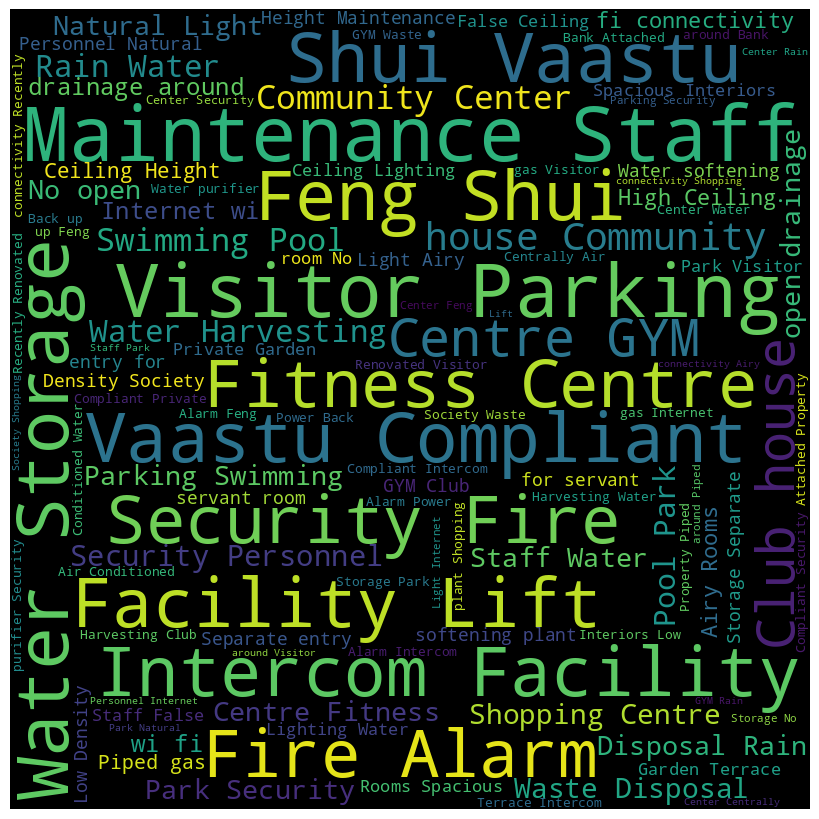

In [289]:
list_feature = []
for fet in sector_features['features']:
  list_feature.extend(fet)

text = ' '.join(list_feature)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='black',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

In [302]:
np.append(np.unique(sector_features['sector']) , 'overall')

array(['bissar', 'dwarka expressway', 'gwal pahari', 'manesar',
       'rajiv chowk', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sector 53', 'sector 54', 'sector 55', 'secto